1. Проведите предварительный анализ и подготовку данных, обработайте
пропущенные значения.

In [69]:
import pandas as pd

df = pd.read_csv('classification_var4.csv', sep=';', names=list(map(str, list(range(1, 8)))) + ['target'])
df.head()

,1,2,3,4,5,6,7,target
0,-0.452892,0.137497,-0.539387,-0.033506,-0.051796,-0.539387,1.309584,1
1,2.183568,-0.465947,0.100564,-0.254450,-0.177177,0.100564,-0.948185,2
2,-1.202893,-0.495887,-1.397155,-0.083091,0.027211,-1.397155,-0.387794,1
3,1.259791,0.059177,-1.695189,-0.438530,1.569401,-1.695189,-0.521768,0
4,1.266819,1.446586,0.584326,-0.060100,0.965535,0.584326,0.299563,2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       95 non-null     float64
 1   2       100 non-null    float64
 2   3       100 non-null    float64
 3   4       100 non-null    float64
 4   5       100 non-null    float64
 5   6       95 non-null     float64
 6   7       100 non-null    float64
 7   target  100 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.4 KB


In [71]:
# удалим пропуски
df = df.dropna()

2. Проведите статистический анализ, оцените корреляции между признаками, оцените
возможные выбросы в данных, постройте поясняющие графики. Удалите из
рассмотрения признаки, которые не влияют на целевой.

<AxesSubplot:>

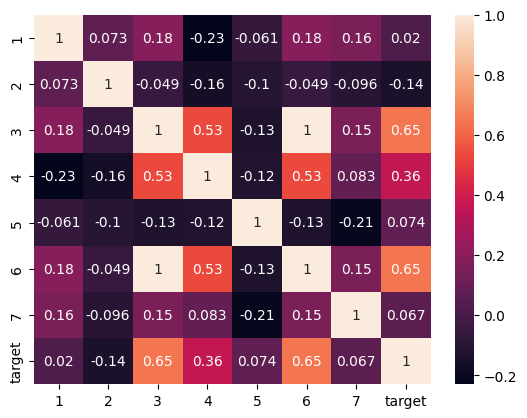

In [72]:
import seaborn as sb

sb.heatmap(df.corr(), annot = True)

Видно, что 3 и 6 признаки одинаковы, удаляем один из них

In [73]:
df = df.drop('6', axis=1)

Проверим выбросы

<AxesSubplot:>

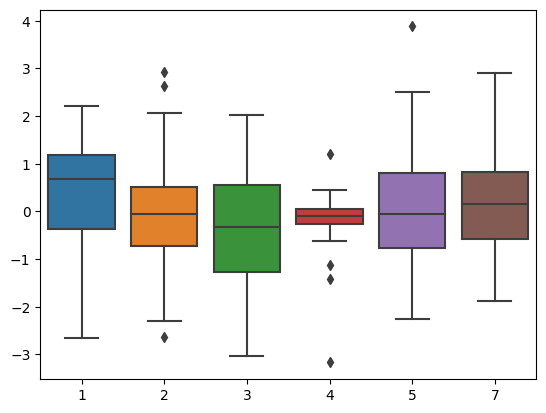

In [74]:
sb.boxplot(data=df.drop('target', axis=1))

Видно большой разброс у четвертого признака, удалим эти строки

In [75]:
df = df.loc[df['4'] < 1]
df = df.loc[df['4'] > -1]

<AxesSubplot:>

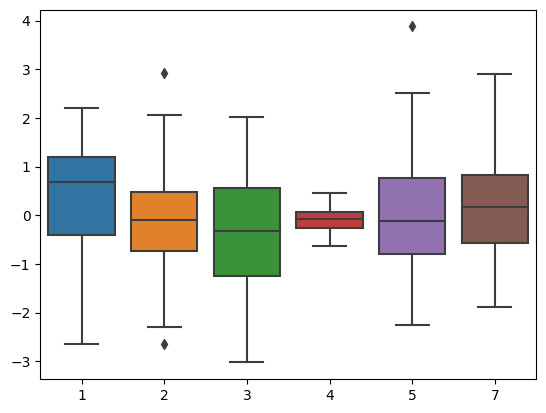

In [76]:
sb.boxplot(data=df.drop('target', axis=1))

3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

4. Для предсказания класса постройте две модели, используя библиотеку sklearn

### RandomForestClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)
print(rfc.score(X_test, y_test))
print(classification_report(rfc.predict(X_test), y_test))

0.8285714285714286
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.82      1.00      0.90         9
           2       0.91      0.77      0.83        13

    accuracy                           0.83        35
   macro avg       0.83      0.85      0.83        35
weighted avg       0.83      0.83      0.83        35



In [79]:
# попробуем подобрать параметры по сетке
# params = {
#     'n_estimators': list(range(50, 201, 10)),
#     'max_depth': list(range(1, 15))
# }
# grid = GridSearchCV(RandomForestClassifier(), params)
# grid.fit(X_train, y_train)
# grid.best_estimator_

In [80]:
# rfc = RandomForestClassifier(max_depth=2, n_estimators=70).fit(X_train, y_train)
# rfc.score(X_test, y_test)

### KNeighborsClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# стандартизация добавила 9% точности (было 0.62)
knc = KNeighborsClassifier().fit(scale(X_train), y_train)
knc.score(scale(X_test), y_test)

0.7142857142857143

In [82]:
# import numpy as np

# params = {
#     'n_neighbors': list(range(1, 10)),
#     'p': np.linspace(1, 4, 100)
# }
# grid = GridSearchCV(KNeighborsClassifier(), params)
# grid.fit(scale(X_train), y_train)
# grid.best_estimator_

In [83]:
# knc = KNeighborsClassifier(n_neighbors=6).fit(scale(X_train), y_train)
# print(knc.score(scale(X_test), y_test))
# print(classification_report(knc.predict(scale(X_test)), y_test))

Классификатор подбирает оптимальные параметры по умолчанию